In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from haze_detection_3d import *
from common import *

def show_images(vid):
	fig = plt.figure(figsize=(32, 32))
    
	for i in range(len(vid)):
		sub = fig.add_subplot(4, len(vid) // 4, i + 1)
		sub.imshow(vid[i] * 255.0)

In [3]:
def low_resolution_3d_haze_detection_v1(url0, url1, *, subsample, seconds): 
    vid0 = get_frames(url0, subsample=subsample, seconds=seconds)
    height, width = vid0[0].shape[:2]
    depth = len(vid0)

    svid0 = np.array(vid0)
    #show_images(vid0)

    vid1 = get_frames(url1, subsample=subsample, seconds=seconds)
    svid1 = np.array(vid1)
    #show_images(vid1)

    haze_image = solve_3d_haze_detection_v1(svid0, svid1)
    haze_vid = [haze_image[i, :, :, :] for i in range(depth)]
    show_images(haze_vid)

def low_resolution_3d_haze_detection_v2(url0, url1, *, subsample, seconds): 
    vid0 = get_frames(url0, subsample=subsample, seconds=seconds)
    height, width = vid0[0].shape[:2]
    depth = len(vid0)

    svid0 = np.array(vid0)
    #show_images(vid0)

    vid1 = get_frames(url1, subsample=subsample, seconds=seconds)
    svid1 = np.array(vid1)
    #show_images(vid1)

    haze_image = solve_3d_haze_detection_v2(svid0, svid1)
    haze_vid = [haze_image[i, :, :, :] for i in range(depth)]
    show_images(haze_vid)

def low_resolution_3d_haze_detection_v3(url0, url1, *, subsample, seconds): 
    vid0 = get_frames(url0, subsample=subsample, seconds=seconds)
    height, width = vid0[0].shape[:2]
    depth = len(vid0)

    svid0 = np.array(vid0)
    #show_images(vid0)

    vid1 = get_frames(url1, subsample=subsample, seconds=seconds)
    svid1 = np.array(vid1)
    #show_images(vid1)

    haze_image = solve_3d_haze_detection_v3(svid0, svid1)
    haze_vid = [haze_image[i, :, :, :] for i in range(depth)]
    show_images(haze_vid)

root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.44&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.52&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.61&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.69&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.77&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.86&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping i

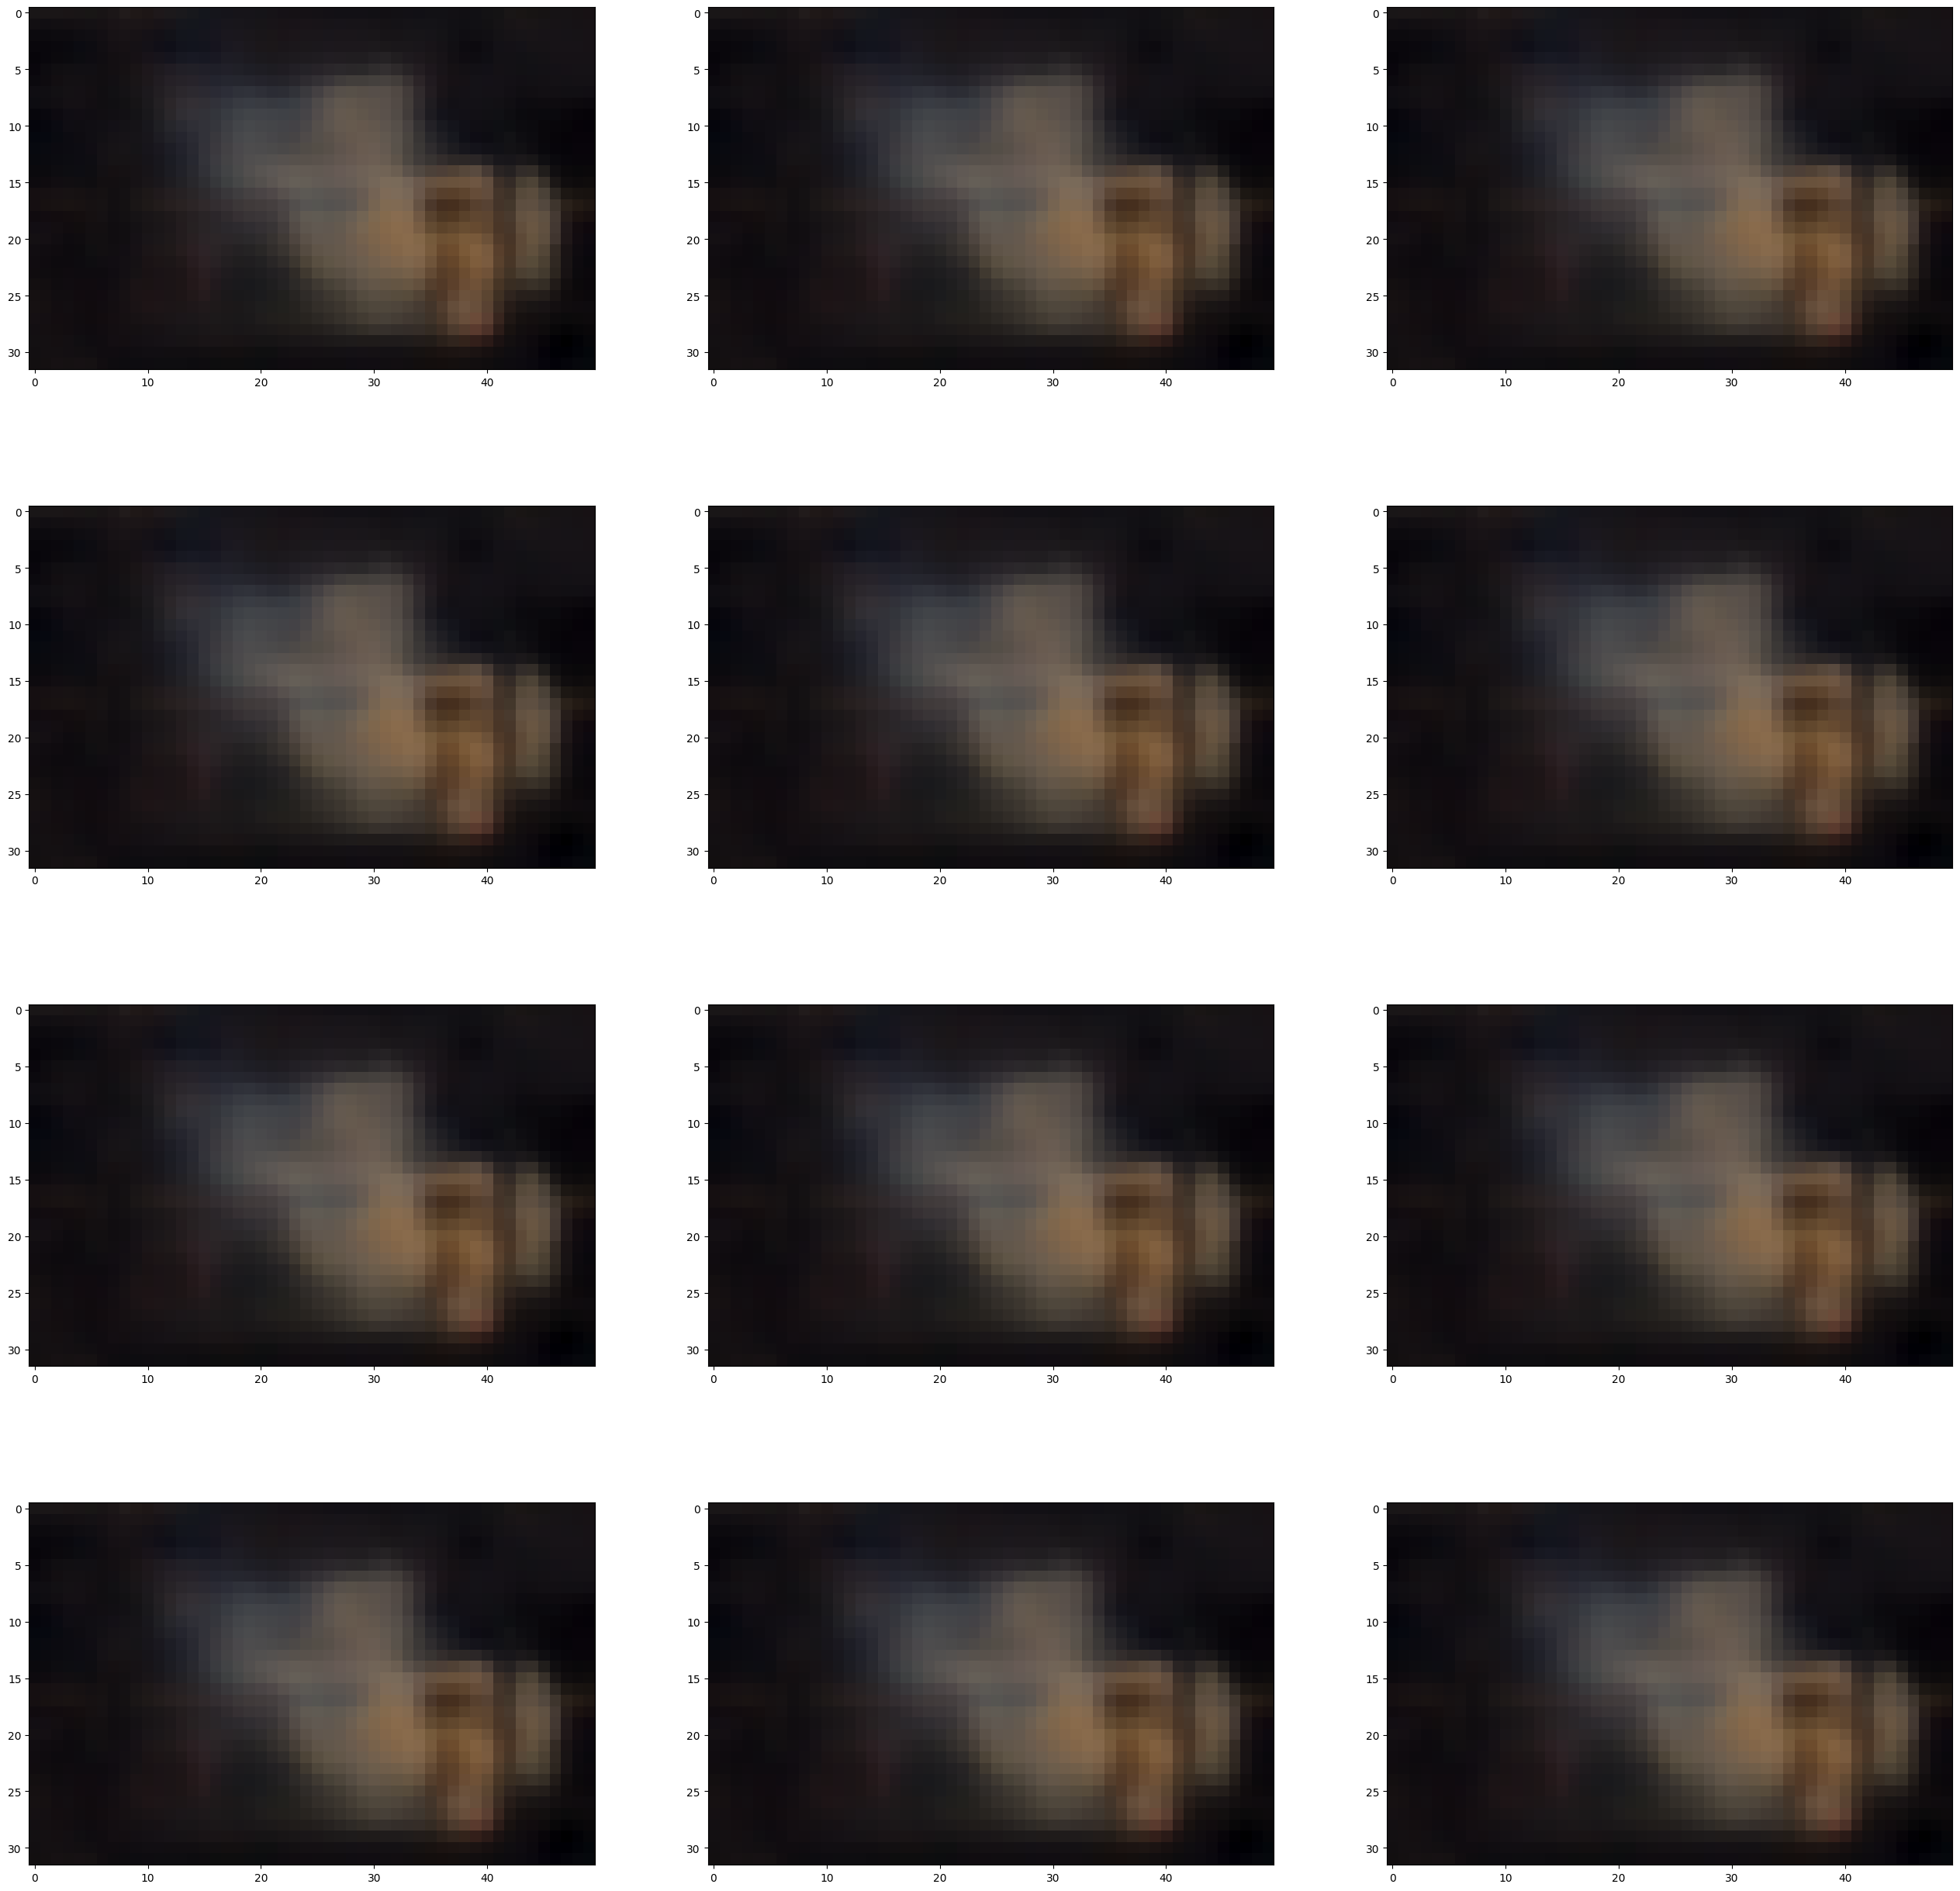

In [4]:
url_no_smoke = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D1015.36%26ps%3D0%26bt%3D20240519140924%26et%3D20240519140924%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"

url_with_smoke = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D984.02%26ps%3D0%26bt%3D20240519135036%26et%3D20240519135036%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"

low_resolution_3d_haze_detection_v3(url_no_smoke, url_with_smoke, subsample=8, seconds=1)

root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.44&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.52&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.61&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.69&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.77&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root_url: https://breathecam.org/#v=4654,2127,4915,2322,pts&t=1015.86&ps=0&bt=20240519140924&et=20240519140924&startDwell=0&endDwell=0&d=2024-05-19&s=clairton4&fps=9
root

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.255948453040608e-16..107.65253988940273].
Clipping i

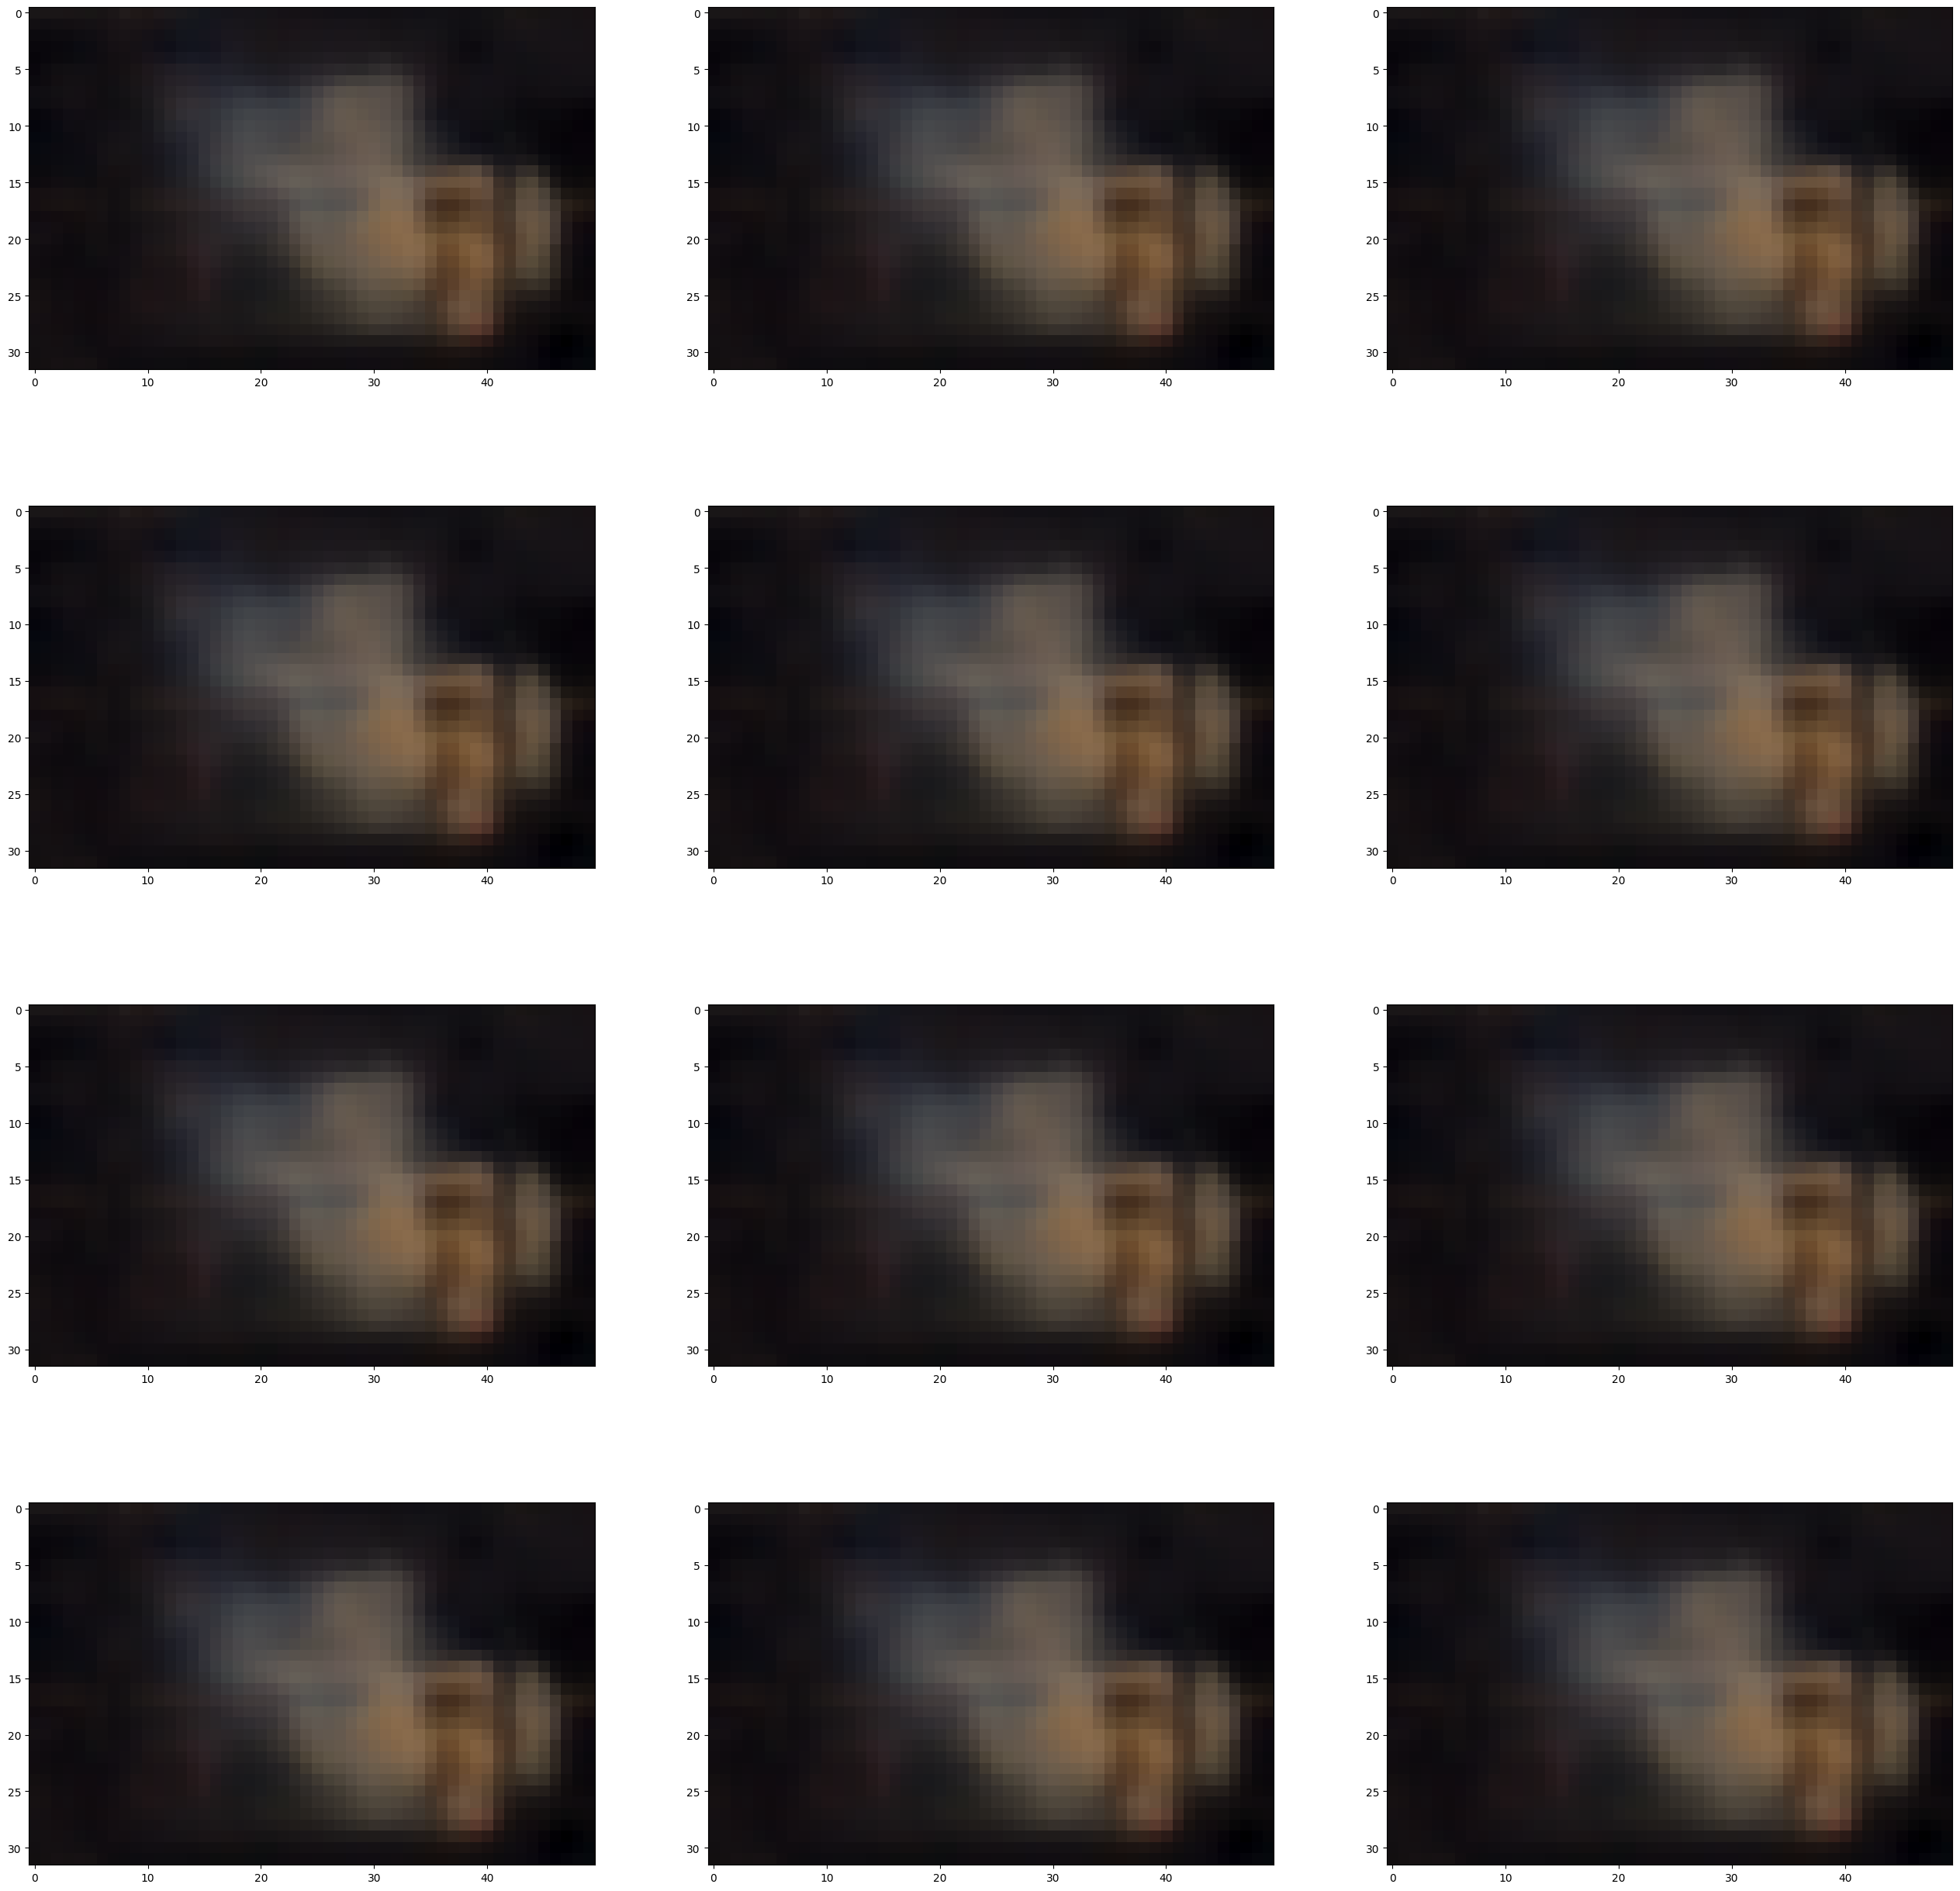

In [5]:
low_resolution_3d_haze_detection_v1(url_no_smoke, url_with_smoke, subsample=8, seconds=1)